# Proyecto BI - Análitica de Texto según ODS

## Etapa 1

## Objetivos

*   Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos del negocio en un contexto de aplicación.
*   Planear la interacción con un grupo interdisciplinario para identificar usuarios y posibles herramientas a desarrollar para la interacción del resultado del modelo desarrollado.

## Problema
<p style="text-align: justify;"> Desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS. Al igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho modelo. El modelo podrá ser utilizado entonces para la interpretación y análisis de la información textual que es recopilada a través de diferentes fuentes por UNFPA en procesos de planeación participativa para el desarrollo a nivel territorial.


### 1. Instalación e importanción de librerías.

In [1]:
!pip install ftfy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install unidecode


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
# !pip install inflect
# !pip install pandas-profiling==2.7.1

In [6]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
from unidecode import unidecode

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score, accuracy_score,
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


/var/folders/c3/74tsbvcd7f59g59y1gww3qk40000gn/T/ipykernel_1418/3507715297.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Configuring pandas to show all cell content
pd.set_option("display.max_colwidth", None)

In [11]:
# Downloading stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sofiatorres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop_words


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [14]:
stop_words.append("usarlas")

In [15]:
stop_words.append("ejecutarlo")

In [16]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

## 2. Perfilamiento y entendimiento de los datos


#### Lectura de los datos.

In [17]:
# Uso de la libreria pandas para la lectura de archivos excel
df = pd.read_excel('./data/cat_345.xlsx')
df_nuevo = pd.read_excel('./data/SinEtiquetatest_cat_345.xlsx')
# Asignación a una nueva variable de los datos leidos
data_t=df
data_t_nuevo=df_nuevo


In [18]:
data_t.shape

(3000, 2)

In [19]:
data_t_nuevo.shape

(1759, 2)

In [20]:
data_t.sample(5)

,Textos_espanol,sdg
993,"La sustitución de la asistencia pública por la asistencia profesional (financiada en parte por los empresarios) o la asistencia privada (con importantes copagos) reduce los costes para los municipios. La elección del usuario, hasta ahora muy limitada en el sistema público, se amplía así con un coste limitado para las finanzas públicas. Sin embargo, el sistema genera incentivos para el desplazamiento de costes entre actividades financiadas a través de diferentes canales, lo que lleva a decisiones subóptimas en cuanto a la prestación de asistencia y a grandes desigualdades en el acceso entre grupos socioeconómicos con diferente cobertura y recursos financieros, y regiones con distinta oferta de asistencia sanitaria.",3
302,"Los indicadores de mortalidad, como el suicidio y la mortalidad prematura, proporcionan información importante sobre el estado de salud mental y la interacción de la salud mental y física, pero se necesitan indicadores más específicos para reflejar la calidad de la atención de salud mental. Medir y mejorar la calidad de la atención de salud mental es un reto fundamental, sobre todo por la necesidad de reflejar vías de atención complejas y abarcar diversos resultados. Numerosos proyectos en curso y finalizados tratan de medir y comparar la calidad y los resultados de la atención de salud mental a escala internacional, a pesar de los numerosos retos a los que se enfrentan.",3
2259,"Es necesario que un liderazgo nacional e internacional firme envíe señales claras y coherentes de que no se tolerarán los abusos en las misiones de mantenimiento de la paz. Es necesario poner en marcha medidas para atender adecuadamente las necesidades de las mujeres, hombres, niños y niñas que han sido reclutados a la fuerza y han sufrido violencia de género. Pueden emprenderse iniciativas para reclutar a mujeres excombatientes en la policía y las fuerzas armadas. Los hombres excombatientes deben recibir asesoramiento y programas destinados a prevenir la violencia de género en el momento de su reinserción.",5
650,"Anuncios gubernamentales recientes señalan la intención de brindar atención dental en algunos entornos de atención primaria. En la práctica, más del 55% de la población está exenta de cualquier costo compartido en el servicio público. Los pagos directos se realizan para aquellos servicios no cubiertos por el paquete de beneficios, incluida la atención dental y las consultas con especialistas en atención ambulatoria privada.",3
2626,"Como se verá, parte de la literatura apunta a cómo el deseo de las mujeres de alejarse de las áreas periféricas, en algún grado, se combina con el deseo de las mujeres de acceder a más oportunidades, así como a una mayor sensación de libertad [o menos social]. control). Forsberg define los contratos de género como reglas y normas no escritas que regulan las relaciones entre hombres y mujeres, y que contribuyen a la creación y mantenimiento de estructuras de oportunidades de género en estas áreas. En su trabajo, Forsberg también ha utilizado el término regiones escaladoras [rulletrapperregioner] para describir las regiones suecas cercanas a las ciudades que, en oposición a las áreas periféricas, están dominadas por lo que ella llama contratos de género contemporáneos, lo que significa una división de género menos tradicional y una percepción menos tradicional de las oportunidades y la libertad de elección de hombres y mujeres. Más tarde, Forsberg, junto con Stenbacka, llevó la noción de contratos de género aún más lejos.",5


In [21]:
data_t_nuevo.sample(5)

,Textos_espanol,sdg
1447,"La CCSS estableció recientemente un programa de monitoreo de calidad en atención primaria (ver Sección 1), con planes para desarrollar un programa similar para hospitales. No se sabe lo suficiente sobre la calidad y los resultados de la atención en Costa Rica. Aunque algunas iniciativas importantes están en marcha, como el marco de monitoreo del desempeño de la atención primaria, la calidad no emerge como la idea rectora dominante dentro de la atención de salud costarricense. Todavía se piensa en la “calidad” en términos limitados (típicamente, tiempos de espera), lo que significa que persisten brechas importantes en la infraestructura de información del sistema de salud. Aunque existe un observatorio nacional del cáncer, por ejemplo, las autoridades no pudieron producir datos sobre el estadio del cáncer en el momento del diagnóstico (vital para comprender la eficacia de los programas de detección y prevención) cuando se les solicitó.",NaN
1149,"En la mayoría de los países, las políticas monetarias se enfocan casi exclusivamente en cumplir metas de inflación muy bajas, que se logran elevando las tasas de interés para evitar que los precios aumenten más rápidamente.40 Las tasas de interés altas ralentizan la actividad económica al encarecer y hacer menos accesible el crédito, reduciendo compras de los consumidores y elevando el costo de financiar las inversiones productivas. Todos estos factores reducen la demanda de mano de obra. Investigaciones recientes han demostrado que el empleo de las mujeres ha disminuido más rápido que el de los hombres en una variedad de países en desarrollo, incluidos Brasil, Colombia, Costa Rica, Filipinas y la República de Corea, que están experimentando reducciones en la inflación asociadas con políticas monetarias restrictivas.41 En países que mantienen un entorno monetario menos restrictivo, tales desigualdades de género son menos evidentes.",NaN
1649,"En 2013, las trabajadoras de tiempo completo ganaban casi un 13,4% menos que sus pares masculinos (Gráfico 2.13). La brecha salarial de género no está ajustada y se calcula como la diferencia entre los ingresos medios de hombres y mujeres en relación con los ingresos medios de los hombres. Las estimaciones de ganancias utilizadas en los cálculos se refieren a las ganancias brutas de los trabajadores asalariados a tiempo completo.",NaN
1626,"Los largos tiempos de espera para los servicios cubiertos pueden impedir gravemente el acceso a la atención y empeorar la salud de los pacientes que requieren un procedimiento. Los tiempos de espera se han medido en varios países de la OCDE, aunque no necesariamente de manera homogénea (Siciliani et al., La calidad de la atención tiene múltiples dimensiones y la OCDE ahora propone un conjunto de indicadores en diferentes dominios que pueden ser utilizados por país con sistemas de información apropiados ¿Qué proporción de los costos se cubre?",NaN
1439,"La Reforma del Presupuesto Federal y el principio de orientación a los resultados se consideran una gran oportunidad para la elaboración de presupuestos con perspectiva de género y para promover políticas de igualdad de género en Austria. Su objetivo es utilizar los fondos existentes de manera equitativa para lograr la igualdad efectiva de mujeres y hombres dentro del presupuesto nacional. La base clave para la gestión presupuestaria sensible al género en todas las autoridades públicas se encuentra en la Constitución Federal de Austria: ""La Federación, los Laender y los municipios deben aspirar a la igualdad de condiciones de mujeres y hombres en la gestión presupuestaria"".",NaN


### 2.1 Limpieza de datos

In [22]:
data_t["sdg"].value_counts(dropna=False, normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

In [23]:
data_t_nuevo["sdg"].value_counts(dropna=False, normalize=True)

sdg
NaN    1.0
Name: proportion, dtype: float64

Se puede ver una distribución equitativa de los datos en los tres grupos de ODS

In [24]:
data_t["Textos_espanol"] = data_t["Textos_espanol"].astype(str)

In [25]:
data_t_nuevo["Textos_espanol"] = data_t_nuevo["Textos_espanol"].astype(str)

### 2.2 Corrección de palabras mal codificadas

In [26]:
import ftfy

def fix_malformed_words(text):
    # Utiliza ftfy para corregir problemas de codificación
    text = ftfy.fix_text(text)
    return text

# Aplica la función a tu DataFrame
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(fix_malformed_words)



In [27]:
import ftfy

def fix_malformed_words(text):
    # Utiliza ftfy para corregir problemas de codificación
    text = ftfy.fix_text(text)
    return text

# Aplica la función a tu DataFrame
data_t_nuevo['Textos_espanol'] = data_t_nuevo['Textos_espanol'].apply(fix_malformed_words)

In [28]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la alta mor

In [29]:
#Se verifica que se haya realizado la corrección
data_t_nuevo.head(5)

,Textos_espanol,sdg
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derecho a la igualdad de retribución por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abordar el estigma y los estereotipos. Tanto el Comité de Derechos Económicos, Sociales y Culturales como el Comité para la Eliminación de la Discriminación contra la Mujer han dado este paso. Directrices para la presentación de informes"", párrafo 29, CDESC, Ecuador, op. cit.",NaN
3,"Hay muchos profesores no cualificados en las escuelas, ya que es difícil contratar a profesores cualificados. Un indicio del reconocimiento del importante papel de los profesores en este contexto es la inclusión por Alberta de preguntas adicionales en la Encuesta Internacional sobre la Enseñanza y el Aprendizaje de la OCDE de 2018 relativas a la comprensión por parte de los profesores y los lÃderes escolares de cuestiones relacionadas con las culturas indÃgenas, la historia y el trabajo con alumnos indÃgenas, asà como sobre el desarrollo profesional pertinente. El enfoque holÃstico de los pueblos indÃgenas hace hincapié en lo mucho que estos contribuyen al bienestar general de los niños, asà como al de todos los demás, además de factores como las ventajas y desventajas materiales. El trauma sufrido por los pueblos indígenas, incluso a través del sistema de escuelas residenciales, todavía es sentido agudamente por muchos. De hecho, se nos dijo que los síntomas del trauma pueden aumentar en lugar de disminuir con el paso del tiempo, exacerbados por las relaciones intergeneracionales. Frente a este panorama más amplio, pueden comprenderse mejor los estudios específicos de determinadas 

### 2.3 Eliminación de caracteres especiales y puntuación

In [30]:
import re
import unicodedata
import inflect
from nltk.corpus import stopwords

# Esta lista contiene las stop words en español
spanish_stopwords = set(stopwords.words('spanish'))

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


### 2.4 Tokenización

In [31]:
data_t['Textos_espanol'] = data_t['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [32]:
data_t_nuevo['Textos_espanol'] = data_t_nuevo['Textos_espanol'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [33]:
data_t['words'] = data_t['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t.head()

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirtyeight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirtythree, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

In [34]:
data_t_nuevo['words'] = data_t_nuevo['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t_nuevo.head()

,Textos_espanol,sdg,words
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,"[basa, nueve, anos, educacion, basica, seis, primaria, tres, secundaria, alumnos, acceden, segundo, ciclo, secundaria, pueden, ir, centro, orientacion, mas, academica, centro, formacion, profesional, aplica, sistema, islamico, islamico, ensenanza, secundaria, superior, formal, comprende, ensenanza, general, sekolah, menengah, atas, sma, ensenanza, profesional, sekolah, menengah, kejuruan, smk, escuelas, secundarias, superiores, islamicas, madrasah, aliyah, ma, ensenanza, profesional, islamica, madrasah, aliyah, kejuruan, mak, capitulo, centra, principalmente, ensenanza, secundaria, superior, academica, mientras, capitulo, five, trata, formacion, profesional, trabajando, desarrollo, colegios, comunitarios, vias, alternativas, acceso, ensenanza, superior]"
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,"[ultima, decada, particular, two thousand and ten, numero, altas, per, capita, tendido, disminuir, ahora, linea, media, ocde, mencionada, anteriormente, ejemplo, habitantes, zonas, rurales, representan, fortythree, poblacion, solo, thirtytwo, altas, hospitalarias, falta, informacion, complementaria, posible, determinar, si, diferencia, indica, disparidades, acceso, poblaciones, rurales, caso, afirmativo, si, causas, geograficas, culturales, infraestructurales, parece, recojan, datos, acceso, atencion, punto, vista, paciente, ayudaria, comprender, naturaleza, obstaculos, acceso, soluciones, general, posible, determinar, datos, disponibles, si, ingresos, caracteristicas, socioeconomicas, pacientes, influyen, hora, llegar, puertas, hospital, ser, ingresado, acceso, desigual, probablemente, deba, tambien, incapacidad, centros, distintas, regiones, prestar, mismos, servicios]"
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derech

### 2.5 Normalización de texto

In [35]:
# Crear instancias de los stemmers y lematizadores
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(words):
    """Stem words in list of tokenized words"""
    stems = [stemmer.stem(word) for word in words]
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmas = []
    for word in words:
        pos = get_wordnet_pos(word)
        if pos:
            lemma = lemmatizer.lemmatize(word, pos)
            lemmas.append(lemma)
        else:
            lemmas.append(word)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(stems)
    return lemmas

def get_wordnet_pos(word):
    """Map POS tag to first character accepted by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


In [36]:
#Se verifica que se haya realizado la corrección
data_t.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirtyeight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirtythree, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

In [37]:
#Se verifica que se haya realizado la corrección
data_t_nuevo.head(5)

,Textos_espanol,sdg,words
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,"[basa, nueve, anos, educacion, basica, seis, primaria, tres, secundaria, alumnos, acceden, segundo, ciclo, secundaria, pueden, ir, centro, orientacion, mas, academica, centro, formacion, profesional, aplica, sistema, islamico, islamico, ensenanza, secundaria, superior, formal, comprende, ensenanza, general, sekolah, menengah, atas, sma, ensenanza, profesional, sekolah, menengah, kejuruan, smk, escuelas, secundarias, superiores, islamicas, madrasah, aliyah, ma, ensenanza, profesional, islamica, madrasah, aliyah, kejuruan, mak, capitulo, centra, principalmente, ensenanza, secundaria, superior, academica, mientras, capitulo, five, trata, formacion, profesional, trabajando, desarrollo, colegios, comunitarios, vias, alternativas, acceso, ensenanza, superior]"
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,"[ultima, decada, particular, two thousand and ten, numero, altas, per, capita, tendido, disminuir, ahora, linea, media, ocde, mencionada, anteriormente, ejemplo, habitantes, zonas, rurales, representan, fortythree, poblacion, solo, thirtytwo, altas, hospitalarias, falta, informacion, complementaria, posible, determinar, si, diferencia, indica, disparidades, acceso, poblaciones, rurales, caso, afirmativo, si, causas, geograficas, culturales, infraestructurales, parece, recojan, datos, acceso, atencion, punto, vista, paciente, ayudaria, comprender, naturaleza, obstaculos, acceso, soluciones, general, posible, determinar, datos, disponibles, si, ingresos, caracteristicas, socioeconomicas, pacientes, influyen, hora, llegar, puertas, hospital, ser, ingresado, acceso, desigual, probablemente, deba, tambien, incapacidad, centros, distintas, regiones, prestar, mismos, servicios]"
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derech

#### Selección de campos

In [38]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo numero consultas externas especialistas three hundred and nineteen cada mil derechohabientes sp comparacion three hundred and thirtyeight six hundred and twenty cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacion ligeramente mayor issste pueden justificarse manera numero recetas pudieron ser surtidas totalidad farmaceutico debido falta existencias thirtythree dentro sp comparacion fourteen dentro imss segun datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,two thousand and seven gobierno central financio directamente solo 03 gasto total salud realizo transferencias especificas gasto salud ascendieron 56 gasto total mayor parte gasto presupuestario salud realizan gobiernos condados condados pobres solo pueden ofrecer bajo nivel atencion poblacion local gobierno provincial proporciona subsidios lado oferta hospitales
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,claramente factores juego particular variedad barreras determinantes sociales pueden relacionados genero clase etnia casta idioma religion surgen estructuras normas procesos sociales arraigados aceptan incluso fomentan dist

In [39]:
data_t_nuevo['words'] = data_t_nuevo['words'].apply(lambda x: ' '.join(map(str, x)))
data_t_nuevo

,Textos_espanol,sdg,words
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,basa nueve anos educacion basica seis primaria tres secundaria alumnos acceden segundo ciclo secundaria pueden ir centro orientacion mas academica centro formacion profesional aplica sistema islamico islamico ensenanza secundaria superior formal comprende ensenanza general sekolah menengah atas sma ensenanza profesional sekolah menengah kejuruan smk escuelas secundarias superiores islamicas madrasah aliyah ma ensenanza profesional islamica madrasah aliyah kejuruan mak capitulo centra principalmente ensenanza secundaria superior academica mientras capitulo five trata formacion profesional trabajando desarrollo colegios comunitarios vias alternativas acceso ensenanza superior
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,ultima decada particular two thousand and ten numero altas per capita tendido disminuir ahora linea media ocde mencionada anteriormente ejemplo habitantes zonas rurales representan fortythree poblacion solo thirtytwo altas hospitalarias falta informacion complementaria posible determinar si diferencia indica disparidades acceso poblaciones rurales caso afirmativo si causas geograficas culturales infraestructurales parece recojan datos acceso atencion punto vista paciente ayudaria comprender naturaleza obstaculos acceso soluciones general posible determinar datos disponibles si ingresos caracteristicas socioeconomicas pacientes influyen hora llegar puertas hospital ser ingresado acceso desigual probablemente deba tambien incapacidad centros distintas regiones prestar mismos servicios
2,"AsÃ, por ejemplo, el estigma asociado a los beneficiarios de prestaciones sociales o a los pobres aumenta su desventaja. Del mismo modo, los errores de dignidad y reconocimiento pueden causar desventajas.54 La infravaloración del trabajo de las mujeres es un error de reconocimiento que causa directamente desventajas socioeconómicas, por lo que el derecho a la igualdad de retribución por un trabajo de igual valor es una sÃntesis importante de las dos primeras dimensiones del derecho a la igualdad: reparar la desventaja y abor

In [40]:
data_t.to_csv('datos_limpios.csv', index=False)

### 3. Entrenamiento del modelo con TF_IDF

En TF-IDF Los valores no son necesariamente enteros, ya que dependen de la frecuencia de un término en un documento específico y en la colección de documentos en su conjunto.

#### 3.1 Data splitting

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["words"]], data_t["sdg"], random_state=1, stratify=data_t['sdg'])

In [42]:
X_train.shape, X_test.shape

((2250, 1), (750, 1))

In [43]:
y_train.shape, y_test.shape

((2250,), (750,))

In [44]:
#ver los primeros datos de entrenamiento
y_train[:5]

876     3
2518    5
2775    5
1910    4
2776    5
Name: sdg, dtype: int64

In [45]:
pd.Series(y_train).value_counts(normalize=True)

sdg
3    0.333333
5    0.333333
4    0.333333
Name: proportion, dtype: float64

In [46]:
pd.Series(y_test).value_counts(normalize=True)

sdg
4    0.333333
5    0.333333
3    0.333333
Name: proportion, dtype: float64

#### 3.2 Vectorización del texto

In [47]:
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'words' que contiene tus textos preprocesados.
texts = X_train['words']


# Crea una instancia de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,  # Número máximo de características (ajusta según sea necesario)
                                   stop_words= stop_words, # Especifica las stop words
                                   lowercase=True)

# Ajusta y transforma tus datos de texto
X_tfidf = tfidf_vectorizer.fit_transform(texts)


# tfidf_matrix es una matriz que contiene las representaciones TF-IDF de tus textos

print(X_tfidf.shape)

print("Vocabulary size:", len(tfidf_vectorizer.vocabulary_))


(2250, 15109)
Vocabulary size: 15109


### 3.3 Selección del modelo

### Primer modelo

In [48]:
tfidf_model = RandomForestClassifier(random_state=3)

In [49]:
print("Shape de X_tfidf:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train[:10])  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test[:10])    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (2250, 1)
Shape de y_train: (2250,)
Shape de y_test: (750,)
Ejemplos de y_train: 876     3
2518    5
2775    5
1910    4
2776    5
2642    5
2251    5
1442    4
1028    4
1592    4
Name: sdg, dtype: int64
Ejemplos de y_test: 1731    4
1436    4
2611    5
2211    5
2955    5
1247    4
777     3
1253    4
1244    4
2180    5
Name: sdg, dtype: int64


In [50]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<Axes: >

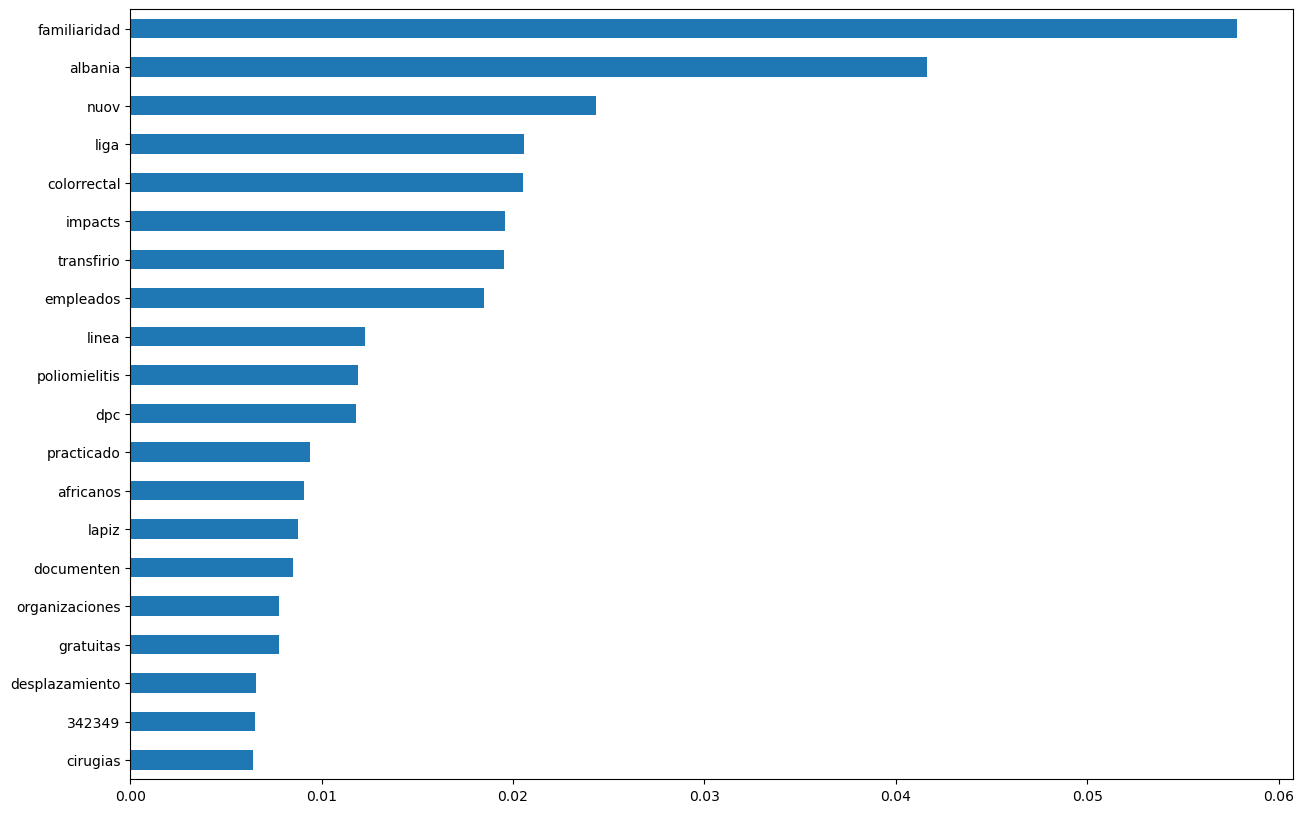

In [51]:
pd.Series(tfidf_model.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [52]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 98.02


In [53]:

# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model.predict(tfidf_vectorizer.transform(X_test["words"]))

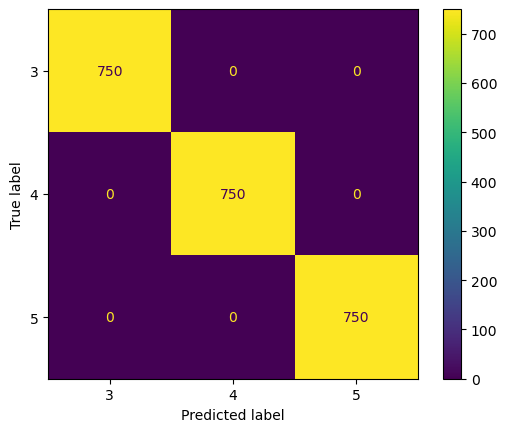

In [54]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

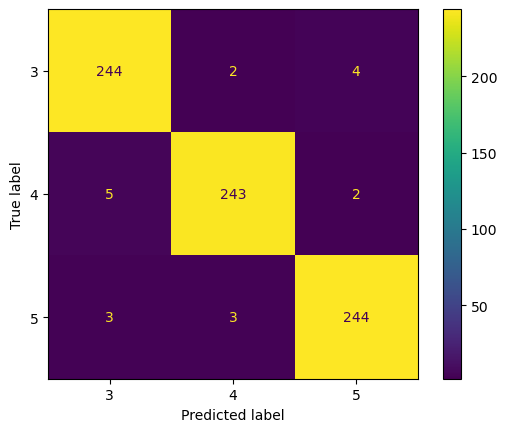

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

#### Métricas para del data frame de entrenamiento

In [56]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))


Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


#### Métricas para de data frame de prueba

In [57]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.9746975593104625
Recall (weighted): 0.9746666666666667
F1 (weighted): 0.9746717227475639


### Segundo modelo

In [58]:
X_train_1=X_train
X_test_1=X_test
y_train_1=y_train
y_test_1=y_test

In [59]:
parametros_1 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 100,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 50
}

In [60]:
pipeline_1 = Pipeline(steps=[
    ("vectorizer", parametros_1["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_1["classifier__n_estimators"],
        criterion=parametros_1["classifier__criterion"],
        max_depth=parametros_1["classifier__max_depth"],
        random_state=4
    ))
])

In [61]:
# Entrena el modelo con tus datos
pipeline_1.fit(X_train_1["words"], y_train_1)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x119481240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=50, random_state=4))])

In [62]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_1 = pipeline_1.predict(X_train_1["words"])
y_test_predict_1 = pipeline_1.predict(X_test_1["words"])

In [63]:
print("Precision (weighted):", precision_score(y_train_1, y_train_predict_1, average='weighted'))
print("Recall (weighted):", recall_score(y_train_1, y_train_predict_1, average='weighted'))
print("F1 (weighted):", f1_score(y_train_1, y_train_predict_1, average='weighted'))

Precision (weighted): 0.9991134751773049
Recall (weighted): 0.9991111111111111
F1 (weighted): 0.9991114064206734


In [64]:
print("Precision (weighted):", precision_score(y_test_1, y_test_predict_1, average='weighted'))
print("Recall (weighted):", recall_score(y_test_1, y_test_predict_1, average='weighted'))
print("F1 (weighted):", f1_score(y_test_1, y_test_predict_1, average='weighted'))

Precision (weighted): 0.9721706579464988
Recall (weighted): 0.972
F1 (weighted): 0.9720136869463488


#### Tercer Modelo

In [65]:
X_train_2=X_train
X_test_2=X_test
y_train_2=y_train
y_test_2=y_test

In [66]:
parametros_2 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": True,
    "classifier__n_estimators": 300,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [67]:
pipeline_2 = Pipeline(steps=[
    ("vectorizer", parametros_2["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_2["classifier__n_estimators"],
        criterion=parametros_2["classifier__criterion"],
        max_depth=parametros_2["classifier__max_depth"],
        random_state=4
    ))
])

In [68]:
# Entrena el modelo con tus datos
pipeline_2.fit(X_train_2["words"], y_train_2)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x119481240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=300,
                                        random_state=4))])

In [69]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_2 = pipeline_2.predict(X_train_2["words"])
y_test_predict_2 = pipeline_2.predict(X_test_2["words"])

In [70]:
print("Precision (weighted):", precision_score(y_train_2, y_train_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_train_2, y_train_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_train_2, y_train_predict_2, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [71]:
print("Precision (weighted):", precision_score(y_test_2, y_test_predict_2, average='weighted'))
print("Recall (weighted):", recall_score(y_test_2, y_test_predict_2, average='weighted'))
print("F1 (weighted):", f1_score(y_test_2, y_test_predict_2, average='weighted'))

Precision (weighted): 0.9734600361410509
Recall (weighted): 0.9733333333333334
F1 (weighted): 0.9733479008369674


#### Cuarto modelo

In [72]:
X_train_3=X_train
X_test_3=X_test
y_train_3=y_train
y_test_3=y_test

In [73]:
parametros_3 = {
    "vectorizer": TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words),
    "vectorizer__lowercase": False,
    "classifier__n_estimators": 350,
    "classifier__criterion": 'gini',
    "classifier__max_depth": 100
}

In [74]:
pipeline_3 = Pipeline(steps=[
    ("vectorizer", parametros_3["vectorizer"]),
    ("classifier", RandomForestClassifier(
        n_estimators=parametros_3["classifier__n_estimators"],
        criterion=parametros_3["classifier__criterion"],
        max_depth=parametros_3["classifier__max_depth"],
        random_state=4
    ))
])

In [75]:
# Entrena el modelo con tus datos
pipeline_3.fit(X_train_3["words"], y_train_3)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x119481240>)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, n_estimators=350,
                                        random_state=4))])

In [76]:
# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_predict_3 = pipeline_3.predict(X_train_3["words"])
y_test_predict_3 = pipeline_3.predict(X_test_3["words"])

In [77]:
print("Precision (weighted):", precision_score(y_train_3, y_train_predict_3, average='weighted'))
print("Recall (weighted):", recall_score(y_train_3, y_train_predict_3, average='weighted'))
print("F1 (weighted):", f1_score(y_train_3, y_train_predict_3, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


In [78]:
print("Precision (weighted):", precision_score(y_test_3, y_test_predict_3, average='weighted'))
print("Recall (weighted):", recall_score(y_test_3, y_test_predict_3, average='weighted'))
print("F1 (weighted):", f1_score(y_test_3, y_test_predict_3, average='weighted'))

Precision (weighted): 0.9774848517134365
Recall (weighted): 0.9773333333333334
F1 (weighted): 0.9773369051026666


#### Quinto modelo

In [79]:
X_train_4=X_train
X_test_4=X_test
y_train_4=y_train
y_test_4=y_test

In [80]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_4["words"])
X_test_tfidf = tfidf_vectorizer.transform(X_test_4["words"])
# y_test_tfidf = tfidf_vectorizer.transform(y_test_4)
# y_train_tfidf = tfidf_vectorizer.transform(y_train_4)

In [81]:
tree_model = DecisionTreeClassifier(max_depth=10, random_state=4)

In [82]:
tree_model.fit(X_train_tfidf, y_train_4)


DecisionTreeClassifier(max_depth=10, random_state=4)

In [83]:
y_train_predict_4 = tree_model.predict(X_train_tfidf)
y_test_predict_4 = tree_model.predict(X_test_tfidf)

In [84]:
print("Precision (weighted):", precision_score(y_train_4, y_train_predict_4, average='weighted'))
print("Recall (weighted):", recall_score(y_train_4, y_train_predict_4, average='weighted'))
print("F1 (weighted):", f1_score(y_train_4, y_train_predict_4, average='weighted'))

Precision (weighted): 0.954462691898449
Recall (weighted): 0.9515555555555556
F1 (weighted): 0.9519843106683067


### 4. Generar predicciones

In [85]:
data_t_nuevo.sample(5)

,Textos_espanol,sdg,words
707,"Por ejemplo, en promedio en los países de la OCDE, es probable que el 12 % de los niños de 15 años aspiren a una carrera como científico, arquitecto o ingeniero, mientras que solo el 5 % de las niñas hacen lo mismo (OECD, 2016[30]). Del mismo modo, una carrera en tecnologías de la información y la comunicación (TIC) es una aspiración para alrededor del 5% de los niños y menos del 1% de las niñas. Además, las expectativas de los padres sobre las carreras relacionadas con STEM también tienden a diferir significativamente según el género (OCDE, 2015 [3i]). Existe alguna evidencia de que esta brecha ha disminuido recientemente (Ernst & Young (EY), 2018(32)). Aún así, en general, la participación de las mujeres en STEM es significativamente más alta que la participación en el emprendimiento financiado con capital de riesgo. Con respecto al financiamiento de la deuda, las empresarias enfrentan un acceso más limitado al crédito e incluso si reciben financiamiento, se enfrentan a tasas de interés más altas (Bellucci , Borisov y Zazzaro, 2010(33], Alesina, Lotti y Mistrulli, 2013(34]).",NaN,ejemplo promedio paises ocde probable twelve ninos fifteen anos aspiren carrera cientifico arquitecto ingeniero mientras solo five ninas hacen mismo oecd two thousand and sixteen thirty mismo modo carrera tecnologias informacion comunicacion tic aspiracion alrededor five ninos menos one ninas ademas expectativas padres carreras relacionadas stem tambien tienden diferir significativamente segun genero ocde two thousand and fifteen 3i existe alguna evidencia brecha disminuido recientemente ernst young ey two thousand and eighteen thirtytwo aun asi general participacion mujeres stem significativamente mas alta participacion emprendimiento financiado capital riesgo respecto financiamiento deuda empresarias enfrentan acceso mas limitado credito incluso si reciben financiamiento enfrentan tasas interes mas altas bellucci borisov zazzaro two thousand and ten thirtythree alesina lotti mistrulli two thousand and thirteen thirtyfour
230,"Las niñas están en desventaja en las regiones con tasas globales de matriculación bajas, mientras que en las regiones con tasas más altas -como Sudamérica, Centroamérica y el sur de Ãfrica- es al revés. A medida que las expectativas educativas de las niñas aumentan a un ritmo más rápido que las de los niños, también lo hace su rendimiento académico. Una vez que han accedido a la enseñanza superior, las mujeres superan a los hombres en calificaciones, evaluaciones y titulaciones (UNESCO, 2012a). Las regiones están en orden descendente según las tasas de matriculación de 2010.",NaN,ninas estan desventaja regiones tasas globales matriculacion bajas mientras regiones tasas mas altas sudamerica centroamerica sur africa reves medida expectativas educativas ninas aumentan ritmo mas rapido ninos tambien hace rendimiento academico vez accedido ensenanza superior mujeres superan hombres calificaciones evaluaciones titulaciones unesco 2012a regiones estan orden descendente segun tasas matriculacion two thousand and ten
1495,"La Sección 3 investiga estrategias para promover una formación profesional de calidad, incluidos los aprendizajes, mientras que la Sección 4 se centra en el apoyo a los estudiantes en riesgo. Para una descripción más detallada y una evaluación del sistema educativo de Letonia, véase OCDE (2015e). El Ministerio de Educación y Ciencia (MoES) nacional tiene la función de supervisión y, a través del Centro Nacional de Educación subordinado, establece los estándares educativos nacionales y determina los planes de estudio y los procedimientos de examen. Proporciona el marco regulatorio para la provisión de educación vocacional y emplea a los directores de los establecimientos VET.1 También mantiene el registro de estándares ocupacionales y estudia las demandas de habilidades del mercado laboral.",NaN,seccion three investiga estrategias promover formacion profesional calidad incluidos aprendi

In [86]:
data_t_nuevo['sdg'] = pipeline_2.predict(data_t_nuevo['words'])

In [87]:
data_t_nuevo['sdg'].describe()

count    1759.000000
mean        4.142695
std         0.787843
min         3.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: sdg, dtype: float64

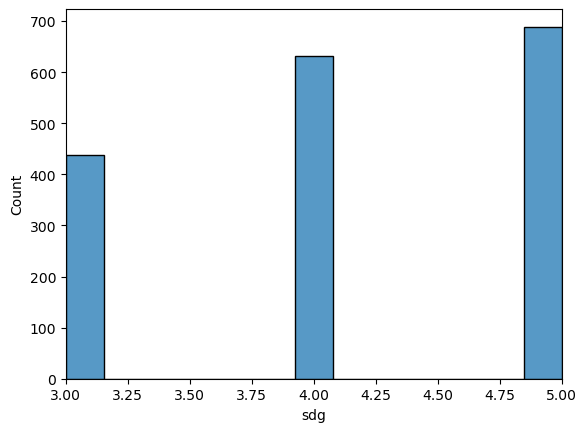

In [88]:
# Create a histogram plot of selling prices
import seaborn as sns

# Create a histogram plot of selling prices
sns.histplot(data_t_nuevo['sdg'])
plt.xlim(3, 5)
# Display the plot
plt.show()

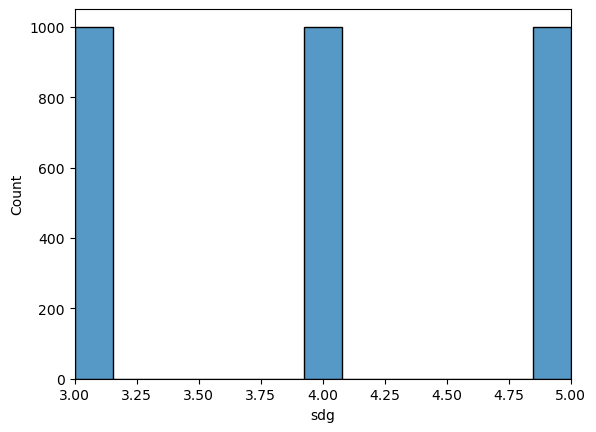

In [89]:
sns.histplot(data_t['sdg'])
plt.xlim(3, 5)
plt.show()

In [90]:
data_t_nuevo.sample(5)

,Textos_espanol,sdg,words
1584,"Mientras que la tasa de recuento multidimensional de los hombres en 2011-2012 fue de 0,40, en el caso de las mujeres fue de 0,68 (Cuadro 11-21). El índice de Alkire y Foster de las mujeres fue de 0,28 frente a 0,10 de los hombres. Por lo tanto, el índice de sesgo de género llegó a 3,0, lo que indica que las mujeres tienen tres veces más privaciones que los hombres. También ha habido cambios estructurales en la población, incluida una mejor proporción de sexos, tasas de natalidad reducidas, un aumento en la edad promedio para contraer matrimonio, una mayor longevidad y un envejecimiento progresivo de la población.",5,mientras tasa recuento multidimensional hombres 20112012 040 caso mujeres 068 cuadro 1121 indice alkire foster mujeres 028 frente 010 hombres indice sesgo genero llego 30 indica mujeres tres veces mas privaciones hombres tambien cambios estructurales poblacion incluida mejor proporcion sexos tasas natalidad reducidas aumento edad promedio contraer matrimonio mayor longevidad envejecimiento progresivo poblacion
1656,"La redistribución del trabajo no remunerado es uno de los pilares para lograr la igualdad de género en América Latina y el Caribe al 2030 (Bidegain Ponte, 2017). La capacidad de colocar a los niños pequeños en guarderías depende en gran medida del poder adquisitivo de los hogares o de los programas que atienden a las mujeres o los hogares pobres o vulnerables. En muchos casos, estos servicios no están regulados o bajo una estricta supervisión estatal, lo que hace que las condiciones y la calidad de la atención en los diferentes centros sean mixtas.",5,redistribucion trabajo remunerado pilares lograr igualdad genero america latina caribe two thousand and thirty bidegain ponte two thousand and seventeen capacidad colocar ninos pequenos guarderias depende gran medida poder adquisitivo hogares programas atienden mujeres hogares pobres vulnerables casos servicios estan regulados bajo estricta supervision estatal hace condiciones calidad atencion diferentes centros mixtas
359,"Las mujeres empresarias constituyen un grupo heterogéneo en términos de edad, formación y educación, y desarrollan su actividad en una amplia gama de sectores. Sin embargo, a menudo trabajan en profesiones en las que las oportunidades y las condiciones para el emprendimiento han sido limitadas, como la sanidad, la enfermerÃa y la educación. No hay grandes diferencias entre el espíritu empresarial de hombres y mujeres en Suecia, pero se observa una diferencia interesante en el nivel de educación. El nivel educativo de las mujeres es superior al de los hombres. Este hecho también se refleja en el número de ingenieras y en las patentes obtenidas por mujeres en los últimos años. En 2006, el 5% de todas las patentes de Suecia fueron registradas por mujeres.",5,mujeres empresarias constituyen grupo heterogeneo terminos edad formacion educacion desarrollan actividad amplia gama sectores embargo menudo trabajan profesiones oportunidades condiciones emprendimiento sido limitadas sanidad enfermeraa educacion grandes diferencias espiritu empresarial hombres mujeres suecia observa diferencia interesante nivel educacion nivel educativo mujeres superior hombres hecho tambien refleja numero ingenieras patentes obtenidas mujeres ultimos anos two thousand and six five todas patentes suecia registradas mujeres
707,"Por ejemplo, en promedio en los países de la OCDE, es probable que el 12 % de los niños de 15 años aspiren a una carrera como científico, arquitecto o ingeniero, mientras que solo el 5 % de las niñas hacen lo mismo (OECD, 2016[30]). Del mismo modo, una carrera en tecnologías de la información y la comunicación (TIC) es una aspiración para alrededor del 5% de los niños y menos del 1% de las niñas. Además, las expectativas de los padres sobre las carreras relacionadas con STEM también tienden a diferir significativamente según el género (OCDE, 2015 [3i]). Existe alguna evidencia de que esta brecha ha disminuido re